# IRIS FLOWER CLASSIFICATION

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

# Import Dataset

In [2]:
df=pd.read_csv("C:/Users/Acer/CodSoft/CSV_folder/IRIS.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.shape

(150, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

<AxesSubplot:>

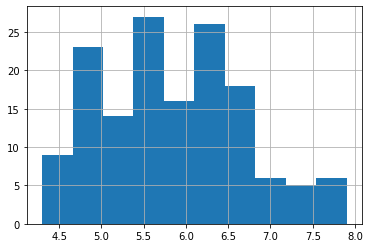

In [7]:
df['sepal_length'].hist()

<AxesSubplot:>

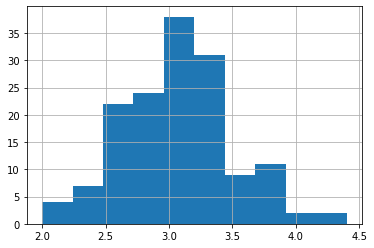

In [8]:
df['sepal_width'].hist()

# scatter plot for sepal length vs sepal width colored by species 

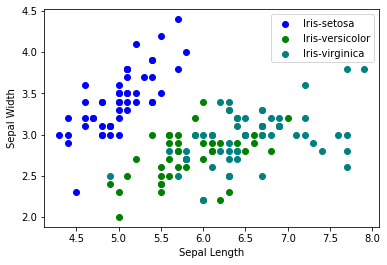

In [9]:
color=['blue','green','teal']
pot=['Iris-setosa','Iris-versicolor','Iris-virginica']
for i in range(3):
    x=df[df['species']==pot[i]]
    plt.scatter(x['sepal_length'],x['sepal_width'],c=color[i],label=pot[i])
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()

<AxesSubplot:>

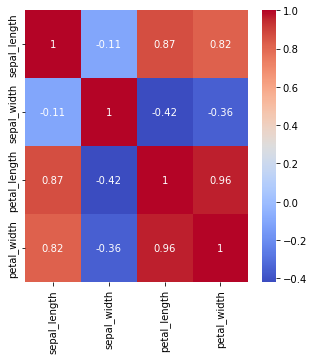

In [10]:
num_col=df.drop(columns='species')
corr=num_col.corr()
fig,axis=plt.subplots(figsize=(5,5))
sns.heatmap(corr,annot=True,ax=axis,cmap='coolwarm')

# Train and Test Dataset

In [11]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [12]:
load=LabelEncoder()
df['species']=load.fit_transform(df['species'])
df.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [13]:
x=df.drop(columns='species')
y=df['species']

In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [15]:
logistic=LogisticRegression(solver='sag',max_iter=2000)
logistic.fit(x_train,y_train)

LogisticRegression(max_iter=2000, solver='sag')

In [16]:
KNN=KNeighborsClassifier()
KNN.fit(x_train,y_train)

KNeighborsClassifier()

In [17]:
Decision=DecisionTreeClassifier()
Decision.fit(x_train,y_train)

DecisionTreeClassifier()

In [18]:
k_accuracy=KNN.score(x_test,y_test)*100
d_accuracy=Decision.score(x_test,y_test)*100
l_acuuracy=logistic.score(x_test,y_test)*100

# Final Output of Accuracy from k nearest neighbor , Decision Tree , Logistic Regression

In [19]:
print(f"K Nearest Neighbors accuracy = {k_accuracy}%")
print(f"Decision Tree accuracy = {d_accuracy}%")
print(f"Logistic Regression accuracy = {l_acuuracy}%")

K Nearest Neighbors accuracy = 97.77777777777777%
Decision Tree accuracy = 95.55555555555556%
Logistic Regression accuracy = 97.77777777777777%
